In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_train = pd.read_csv('train.csv')
raw_test_submit = pd.read_csv('test.csv')

In [4]:
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [5]:
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


## Extracting Features

In [6]:
raw_train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [7]:
raw_train.isnull().sum() # No missing values

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [8]:
raw_train.head(3)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0


In [9]:
raw_train['Employment Duration'].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

In [10]:
raw_train['Grade'].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

In [11]:
raw_train['Sub Grade'].value_counts()

B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64

In [12]:
mean_labels = raw_train.groupby(['Grade'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'B': 0, 'A': 1, 'C': 2, 'E': 3, 'D': 4, 'F': 5, 'G': 6}

In [13]:
raw_train['Grade_mean_encoded'] = raw_train['Grade'].map(mean_labels2)
raw_train.drop(['Grade'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Employment Duration,Home Ownership,...,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,MORTGAGE,176346.62670,...,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,RENT,39833.92100,...,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,2
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,MORTGAGE,91506.69105,...,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,5
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,MORTGAGE,108286.57590,...,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,2
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,MORTGAGE,44234.82545,...,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,2


In [14]:
mean_labels = raw_train.groupby(['Employment Duration'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'MORTGAGE': 0, 'RENT': 1, 'OWN': 2}

In [15]:
raw_train['Employment_mean_encoded'] = raw_train['Employment Duration'].map(mean_labels2)
raw_train.drop(['Employment Duration'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Verification Status,...,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,176346.62670,Not Verified,...,0,INDIVIDUAL,49,0,31,311301,6619,0,0,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,39833.92100,Source Verified,...,0,INDIVIDUAL,109,0,53,182610,20885,0,2,1
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,91506.69105,Source Verified,...,0,INDIVIDUAL,66,0,34,89801,26155,0,5,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,108286.57590,Source Verified,...,0,INDIVIDUAL,39,0,40,9189,60214,0,2,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,44234.82545,Source Verified,...,0,INDIVIDUAL,18,0,430,126029,22579,0,2,0


In [16]:
mean_labels = raw_train.groupby(['Application Type'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'JOINT': 0, 'INDIVIDUAL': 1}

In [17]:
raw_train['Application_mean_encoded'] = raw_train['Application Type'].map(mean_labels2)
raw_train.drop(['Application Type'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Verification Status,...,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,176346.62670,Not Verified,...,0,49,0,31,311301,6619,0,0,0,1
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,39833.92100,Source Verified,...,0,109,0,53,182610,20885,0,2,1,1
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,91506.69105,Source Verified,...,0,66,0,34,89801,26155,0,5,0,1
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,108286.57590,Source Verified,...,0,39,0,40,9189,60214,0,2,0,1
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,44234.82545,Source Verified,...,0,18,0,430,126029,22579,0,2,0,1


In [18]:
mean_labels = raw_train.groupby(['Verification Status'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'Verified': 0, 'Not Verified': 1, 'Source Verified': 2}

In [19]:
raw_train['Verification_mean_encoded'] = raw_train['Verification Status'].map(mean_labels2)
raw_train.drop(['Verification Status'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Payment Plan,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,176346.62670,n,...,49,0,31,311301,6619,0,0,0,1,1
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,39833.92100,n,...,109,0,53,182610,20885,0,2,1,1,2
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,91506.69105,n,...,66,0,34,89801,26155,0,5,0,1,2
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,108286.57590,n,...,39,0,40,9189,60214,0,2,0,1,2
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,44234.82545,n,...,18,0,430,126029,22579,0,2,0,1,2


In [20]:
mean_labels = raw_train.groupby(['Payment Plan'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'n': 0}

In [21]:
raw_train['Payment_mean_encoded'] = raw_train['Payment Plan'].map(mean_labels2)
raw_train.drop(['Payment Plan'], axis='columns', inplace=True)
raw_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded,Payment_mean_encoded
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,C4,176346.62670,Debt Consolidation,...,0,31,311301,6619,0,0,0,1,1,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,D3,39833.92100,Debt consolidation,...,0,53,182610,20885,0,2,1,1,2,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,D4,91506.69105,Debt Consolidation,...,0,34,89801,26155,0,5,0,1,2,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C3,108286.57590,Debt consolidation,...,0,40,9189,60214,0,2,0,1,2,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,D4,44234.82545,Credit card refinancing,...,0,430,126029,22579,0,2,0,1,2,0


### For test

In [22]:
mean_labels = raw_test_submit.groupby(['Grade'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [23]:
raw_test_submit['Grade_mean_encoded'] = raw_test_submit['Grade'].map(mean_labels2)
raw_test_submit.drop(['Grade'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Employment Duration,Home Ownership,...,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,RENT,76468.82190,...,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN,0
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,MORTGAGE,38079.01344,...,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN,1
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,MORTGAGE,51275.93268,...,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN,0
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,RENT,68867.98965,...,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN,0
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,OWN,91556.85423,...,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN,2


In [24]:
mean_labels = raw_test_submit.groupby(['Employment Duration'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'MORTGAGE': 0, 'OWN': 1, 'RENT': 2}

In [25]:
raw_test_submit['Employment_mean_encoded'] = raw_test_submit['Employment Duration'].map(mean_labels2)
raw_test_submit.drop(['Employment Duration'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Verification Status,...,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,76468.82190,Source Verified,...,0,INDIVIDUAL,135,0,24,475442,4364,NaN,0,2
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,38079.01344,Source Verified,...,0,INDIVIDUAL,56,0,1,72412,2573,NaN,1,0
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,51275.93268,Source Verified,...,0,INDIVIDUAL,3,0,26,284825,19676,NaN,0,0
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,68867.98965,Verified,...,0,INDIVIDUAL,21,0,32,40842,7226,NaN,0,2
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,91556.85423,Verified,...,0,INDIVIDUAL,104,0,33,90825,26145,NaN,2,1


In [26]:
mean_labels = raw_test_submit.groupby(['Application Type'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'INDIVIDUAL': 0, 'JOINT': 1}

In [27]:
raw_test_submit['Application_mean_encoded'] = raw_test_submit['Application Type'].map(mean_labels2)
raw_test_submit.drop(['Application Type'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Verification Status,...,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,76468.82190,Source Verified,...,0,135,0,24,475442,4364,NaN,0,2,0
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,38079.01344,Source Verified,...,0,56,0,1,72412,2573,NaN,1,0,0
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,51275.93268,Source Verified,...,0,3,0,26,284825,19676,NaN,0,0,0
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,68867.98965,Verified,...,0,21,0,32,40842,7226,NaN,0,2,0
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,91556.85423,Verified,...,0,104,0,33,90825,26145,NaN,2,1,0


In [28]:
mean_labels = raw_test_submit.groupby(['Verification Status'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [29]:
raw_test_submit['Verification_mean_encoded'] = raw_test_submit['Verification Status'].map(mean_labels2)
raw_test_submit.drop(['Verification Status'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Payment Plan,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,76468.82190,n,...,135,0,24,475442,4364,NaN,0,2,0,1
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,38079.01344,n,...,56,0,1,72412,2573,NaN,1,0,0,1
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,51275.93268,n,...,3,0,26,284825,19676,NaN,0,0,0,1
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,68867.98965,n,...,21,0,32,40842,7226,NaN,0,2,0,2
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,91556.85423,n,...,104,0,33,90825,26145,NaN,2,1,0,2


In [30]:
mean_labels = raw_test_submit.groupby(['Payment Plan'])['Loan Status'].mean().sort_values().index
mean_labels2 = {k:i for i,k in enumerate(mean_labels)}
mean_labels2

{'n': 0}

In [31]:
raw_test_submit['Payment_mean_encoded'] = raw_test_submit['Payment Plan'].map(mean_labels2)
raw_test_submit.drop(['Payment Plan'], axis='columns', inplace=True)
raw_test_submit.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded,Payment_mean_encoded
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,D1,76468.82190,Home improvement,...,0,24,475442,4364,NaN,0,2,0,1,0
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,E3,38079.01344,Credit card refinancing,...,0,1,72412,2573,NaN,1,0,0,1,0
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,C3,51275.93268,Debt consolidation,...,0,26,284825,19676,NaN,0,0,0,1,0
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A2,68867.98965,Debt Consolidation,...,0,32,40842,7226,NaN,0,2,0,2,0
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,B3,91556.85423,Debt consolidation,...,0,33,90825,26145,NaN,2,1,0,2,0


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
raw_train['Batch Enrolled'] =  label_encoder.fit_transform(raw_train['Batch Enrolled'])
# raw_train['Batch Enrolled'].max()

In [33]:
raw_train['Sub Grade'] = label_encoder.fit_transform(raw_train['Sub Grade'])

In [34]:
raw_train['Loan Title'] = label_encoder.fit_transform(raw_train['Loan Title'])

In [35]:
raw_train['Initial List Status']= label_encoder.fit_transform(raw_train['Initial List Status'])

In [36]:
raw_test_submit['Batch Enrolled'] =  label_encoder.fit_transform(raw_test_submit['Batch Enrolled'])

In [37]:
raw_test_submit['Sub Grade'] = label_encoder.fit_transform(raw_test_submit['Sub Grade'])

In [38]:
raw_test_submit['Loan Title'] = label_encoder.fit_transform(raw_test_submit['Loan Title'])

In [39]:
raw_test_submit['Initial List Status']= label_encoder.fit_transform(raw_test_submit['Initial List Status'])

In [40]:
X = raw_train.drop(['Loan Status'],axis='columns')
y = raw_train['Loan Status']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
# X_train = raw_train.drop(['Loan Status'], axis='columns')

In [43]:
# y_train = raw_train['Loan Status']

In [44]:
# X_test = raw_test_submit.drop(['Loan Status'], axis='columns')

In [45]:
# raw_test_submit['Loan Status'] = 0
# # y_test = raw_test_submit['Loan Status']
# # y_test

In [46]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded,Payment_mean_encoded
0,-0.397747,1.388943,-0.208866,0.833420,0.0,-0.894737,1.657187,-0.090909,-1.073776,-0.363636,...,0.159420,0.0,-0.454545,-0.546334,-0.519727,0.000000,1.0,0.0,0.5,0.0
1,-0.133187,-0.497545,0.780944,1.374284,0.0,0.315789,-0.132583,1.181818,0.637176,0.000000,...,-0.507246,0.0,-0.136364,-0.617939,-0.135034,0.666667,1.0,0.0,0.5,0.0
2,-0.243334,0.003969,-0.432688,1.672122,-1.0,0.894737,1.987185,-0.636364,-0.246219,-0.363636,...,-0.521739,0.0,21.318182,1.499907,1.767314,0.000000,1.0,0.0,0.5,0.0
3,-0.124944,0.224200,0.212854,1.488796,-1.0,0.000000,0.033853,-0.272727,0.186158,0.636364,...,-0.782609,0.0,0.727273,-0.454335,-0.183267,-0.333333,2.0,0.0,-0.5,0.0
4,0.887724,-0.353998,-0.678605,-0.051231,-1.0,0.631579,-0.287584,0.000000,1.114699,4.272727,...,-0.840580,0.0,-0.454545,-0.140936,3.811194,-0.666667,1.0,0.0,0.5,0.0


In [47]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded,Payment_mean_encoded
0,0.954171,-0.978203,-0.112633,-0.810449,-1.0,-0.388889,-0.216479,-0.090909,-0.122362,2.818182,...,-0.826087,0.0,0.409091,0.444672,-0.518703,-0.666667,0.0,0.0,0.0,0.0
1,0.993458,1.515258,-0.121045,0.370605,0.0,0.722222,1.461529,0.181818,0.020447,-0.363636,...,-0.014493,0.0,0.318182,-0.462169,0.066327,0.000000,0.0,0.0,0.5,0.0
2,-0.381930,0.169416,-0.489786,-0.584347,-1.0,0.000000,1.085344,0.818182,-0.902869,1.636364,...,1.086957,0.0,0.136364,-0.148048,1.155974,0.000000,0.0,0.0,0.5,0.0
3,0.681947,0.858791,-0.075142,-0.022974,-1.0,0.833333,0.103161,0.363636,0.163995,3.000000,...,-0.434783,0.0,-0.909091,-0.253149,-0.406946,-0.666667,0.0,0.0,0.5,0.0
4,0.605543,-0.370630,1.303933,-1.128681,0.0,0.111111,-0.904127,-0.909091,0.108368,2.454545,...,-0.898551,0.0,-0.909091,-0.270204,0.552389,0.000000,0.0,0.0,-0.5,0.0


In [48]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [49]:
mask = yhat != -1

In [50]:
X_train = X_train[mask]

In [51]:
y_train = y_train[mask]

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

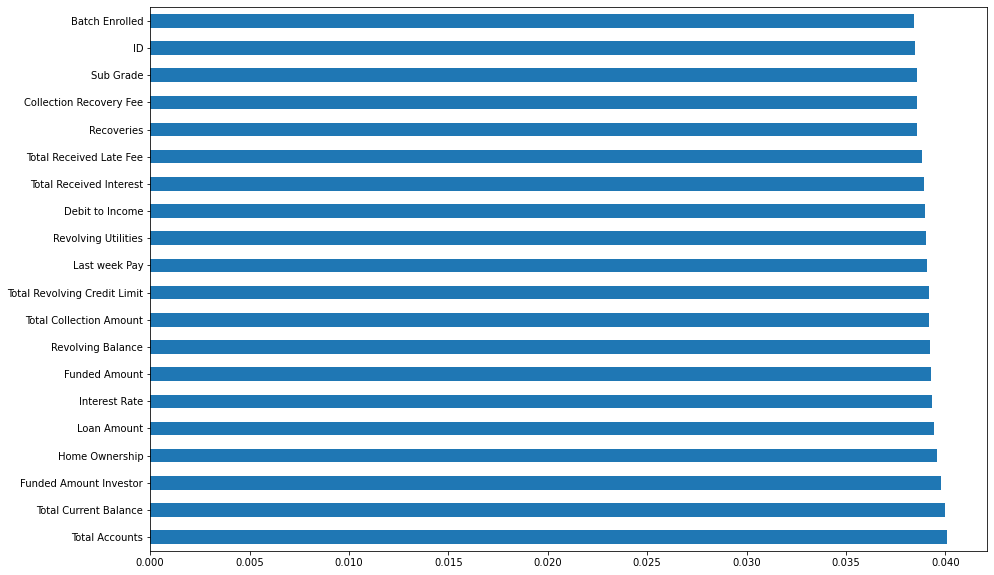

In [53]:
plt.figure(figsize = [15,10])
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [54]:
ranked_features.nlargest(20, keep='all')

Total Accounts                  0.040103
Total Current Balance           0.039980
Funded Amount Investor          0.039766
Home Ownership                  0.039605
Loan Amount                     0.039447
Interest Rate                   0.039329
Funded Amount                   0.039275
Revolving Balance               0.039217
Total Collection Amount         0.039188
Total Revolving Credit Limit    0.039181
Last week Pay                   0.039099
Revolving Utilities             0.039050
Debit to Income                 0.039001
Total Received Interest         0.038940
Total Received Late Fee         0.038806
Recoveries                      0.038585
Collection Recovery Fee         0.038568
Sub Grade                       0.038559
ID                              0.038462
Batch Enrolled                  0.038449
dtype: float64

In [55]:
from sklearn.feature_selection import mutual_info_classif

In [76]:
high_score_features = []
feature_scores = pd.Series(mutual_info_classif(raw_train.drop(['Loan Status'], axis='columns'), raw_train['Loan Status']),index=X_train.columns)

# for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True):
#         print(score, f_name)
#         high_score_features.append(f_name)
# # df_wine_norm_mic = X_train[high_score_features]
# # print(df_wine_norm_mic.columns)

In [77]:
feature_scores.sort_values(ascending=False)

Application_mean_encoded        1.427055e-02
Verification_mean_encoded       5.243110e-03
Term                            4.729761e-03
Initial List Status             4.481748e-03
Loan Title                      3.906228e-03
Collection Recovery Fee         2.606772e-03
Grade_mean_encoded              2.184364e-03
Delinquency - two years         1.776947e-03
Revolving Utilities             1.629028e-03
Loan Amount                     1.616972e-03
Employment_mean_encoded         1.573070e-03
Funded Amount                   1.001309e-03
Revolving Balance               9.170744e-04
Total Received Interest         7.368502e-04
Payment_mean_encoded            4.998320e-04
Debit to Income                 4.978038e-04
Sub Grade                       4.476436e-04
Recoveries                      4.211444e-04
Funded Amount Investor          3.609248e-04
Accounts Delinquent             2.436140e-04
Total Collection Amount         1.770960e-04
Collection 12 months Medical    1.510171e-04
Interest R

In [57]:
mutual_data=pd.Series(feature_scores,index=X_train.columns)
mutual_data.sort_values(ascending=False).tail(15).index

Index(['Recoveries', 'Total Current Balance', 'Total Collection Amount',
       'Total Revolving Credit Limit', 'Accounts Delinquent', 'ID',
       'Collection 12 months Medical', 'Total Received Late Fee',
       'Initial List Status', 'Delinquency - two years', 'Home Ownership',
       'Interest Rate', 'Batch Enrolled', 'Funded Amount',
       'Payment_mean_encoded'],
      dtype='object')

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [69]:
X_col = X_train.iloc[:,:]
X_col = calc_vif(X_col)


D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [70]:
X_col.sort_values('VIF', ascending=True).reset_index()

,index,variables,VIF
0,5,Batch Enrolled,1.001102
1,31,Application_mean_encoded,1.001771
2,10,Debit to Income,1.004462
3,24,Last week Pay,1.005098
4,22,Collection Recovery Fee,1.005305
5,16,Revolving Utilities,1.005855
6,17,Total Accounts,1.006281
7,1,Loan Amount,1.007759
8,23,Collection 12 months Medical,1.008070
9,6,Interest Rate,1.012474


In [78]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [93]:
X_clf_new=SelectKBest(score_func=chi2,k=10).fit(raw_train.drop(['Loan Status'], axis='columns'), raw_train['Loan Status'])

In [90]:
for item in list(zip(X_train.columns, list(X_clf_new.scores_))):
    print(item)

('ID', 260648.6175379803)
('Loan Amount', 5609.266992126577)
('Funded Amount', 528.8479432594877)
('Funded Amount Investor', 1.7580847143238945)
('Term', 0.14927580168219157)
('Batch Enrolled', 28.118051888272245)
('Interest Rate', 0.6622077247957663)
('Sub Grade', 4.175723489433529)
('Home Ownership', 23448.977500366287)
('Loan Title', 0.03163691725509864)
('Debit to Income', 1.9333079447942332)
('Delinquency - two years', 13.202208898885136)
('Inquires - six months', 0.03466624286670867)
('Open Account', 9.16630211488494)
('Public Record', 11.161629079130167)
('Revolving Balance', 619.7209969890188)
('Revolving Utilities', 10.99866754537232)
('Total Accounts', 0.01234748580745354)
('Initial List Status', 5.633078249600951)
('Total Received Interest', 454.11278770825663)
('Total Received Late Fee', 142.24322135610564)
('Recoveries', 61.15903649557779)
('Collection Recovery Fee', 10.699104235147948)
('Collection 12 months Medical', 0.03109520572056699)
('Last week Pay', 66.551202897240

In [94]:
scores = pd.Series(X_clf_new.scores_, index=X_train.columns)
scores.nlargest(20)

Total Current Balance           789324.010294
ID                              260648.617538
Home Ownership                   23448.977500
Total Collection Amount          15897.432585
Loan Amount                       5609.266992
Total Revolving Credit Limit      2697.242208
Revolving Balance                  619.720997
Funded Amount                      528.847943
Total Received Interest            454.112788
Total Received Late Fee            142.243221
Last week Pay                       66.551203
Recoveries                          61.159036
Batch Enrolled                      28.118052
Grade_mean_encoded                  16.942025
Delinquency - two years             13.202209
Employment_mean_encoded             12.863878
Public Record                       11.161629
Revolving Utilities                 10.998668
Collection Recovery Fee             10.699104
Open Account                         9.166302
dtype: float64

In [ ]:
to_drop = ['Funded Amount', 'ID', 'Accounts Delinquent', 'Total Revolving Credit Limit', 'Total Accounts', 'Last week Pay', 'Total Received Late Fee', 'Open Account', 'Inquires - six months', 'Home Ownership', 'Sub Grade', 'Interest Rate', 'Batch Enrolled', 'Payment_mean_encoded']

In [95]:
X_train = X_train.drop(columns = ['Payment_mean_encoded', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Revolving Balance', 'Total Received Late Fee', 'Last week Pay', 'Total Accounts', 'ID', 'Application_mean_encoded', 'Total Collection Amount', 'Total Revolving Credit Limit'])
X_train

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Loan Title,Inquires - six months,Open Account,...,Initial List Status,Total Received Interest,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Accounts Delinquent,Total Current Balance,Grade_mean_encoded,Employment_mean_encoded,Verification_mean_encoded
0,1.388943,-0.208866,0.833420,0.0,-0.894737,1.657187,-0.090909,-0.363636,0.0,-0.166667,...,0.0,-0.192911,-0.693583,-0.787944,0.0,0.0,-0.546334,0.000000,1.0,0.5
1,-0.497545,0.780944,1.374284,0.0,0.315789,-0.132583,1.181818,0.000000,0.0,2.333333,...,0.0,-0.232426,-0.211118,0.252479,0.0,0.0,-0.617939,0.666667,1.0,0.5
2,0.003969,-0.432688,1.672122,-1.0,0.894737,1.987185,-0.636364,-0.363636,1.0,-0.166667,...,-1.0,-0.254975,-0.317182,-0.001774,0.0,0.0,1.499907,0.000000,1.0,0.5
3,0.224200,0.212854,1.488796,-1.0,0.000000,0.033853,-0.272727,0.636364,0.0,-0.833333,...,0.0,0.268627,0.677799,-1.008167,0.0,0.0,-0.454335,-0.333333,2.0,-0.5
4,-0.353998,-0.678605,-0.051231,-1.0,0.631579,-0.287584,0.000000,4.272727,0.0,0.000000,...,0.0,0.994935,0.868388,-0.619020,0.0,0.0,-0.140936,-0.666667,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53964,0.155127,-0.552256,0.127108,0.0,0.421053,-0.776494,-0.272727,0.636364,0.0,1.333333,...,-1.0,5.342013,-0.663877,1.079027,0.0,0.0,2.422218,-0.333333,0.0,-0.5
53965,0.121655,0.560392,0.635973,-23.0,-0.789474,-0.054044,0.363636,-0.363636,0.0,-0.500000,...,0.0,-0.547759,-0.310927,-0.463169,0.0,0.0,-0.517602,0.666667,0.0,0.5
53966,0.106924,-0.652761,-0.118121,0.0,0.684211,0.738842,0.727273,-0.363636,0.0,0.166667,...,-1.0,-0.568634,0.000380,0.002148,0.0,0.0,-0.259216,-0.333333,0.0,0.0
53967,1.138923,-0.788602,-0.575299,0.0,-0.210526,-0.032473,-0.818182,0.636364,0.0,-1.333333,...,0.0,-0.281005,-0.711913,-0.346859,0.0,0.0,0.394920,0.000000,1.0,0.0


In [96]:
X_test = X_test.drop(columns = ['Payment_mean_encoded', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Revolving Balance', 'Total Received Late Fee', 'Last week Pay', 'Total Accounts', 'ID', 'Application_mean_encoded', 'Total Collection Amount', 'Total Revolving Credit Limit'])
X_test

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Loan Title,Inquires - six months,Open Account,...,Initial List Status,Total Received Interest,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Accounts Delinquent,Total Current Balance,Grade_mean_encoded,Employment_mean_encoded,Verification_mean_encoded
0,-0.978203,-0.112633,-0.810449,-1.0,-0.388889,-0.216479,-0.090909,2.818182,0.0,-1.166667,...,0.0,-0.189297,-0.061208,0.472337,0.0,0.0,0.444672,-0.666667,0.0,0.0
1,1.515258,-0.121045,0.370605,0.0,0.722222,1.461529,0.181818,-0.363636,0.0,-0.500000,...,0.0,0.456320,0.664353,-0.041185,0.0,0.0,-0.462169,0.000000,0.0,0.5
2,0.169416,-0.489786,-0.584347,-1.0,0.000000,1.085344,0.818182,1.636364,0.0,-0.666667,...,-1.0,-0.576504,0.022342,0.272253,0.0,0.0,-0.148048,0.000000,0.0,0.5
3,0.858791,-0.075142,-0.022974,-1.0,0.833333,0.103161,0.363636,3.000000,0.0,0.000000,...,0.0,-0.351340,0.650600,-0.425013,0.0,0.0,-0.253149,-0.666667,0.0,0.5
4,-0.370630,1.303933,-1.128681,0.0,0.111111,-0.904127,-0.909091,2.454545,0.0,-0.500000,...,-1.0,1.706912,811.081740,0.346117,0.0,0.0,-0.270204,0.000000,0.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,-0.419779,0.782104,-0.255762,0.0,-0.333333,-0.696268,-0.090909,0.636364,0.0,0.500000,...,0.0,1.731055,0.139108,-0.002284,0.0,0.0,0.461508,-0.666667,0.0,0.5
13489,0.016497,-0.182969,-0.572977,0.0,0.333333,-0.017702,1.454545,0.636364,0.0,-0.333333,...,0.0,-0.191453,0.554041,-1.148930,0.0,0.0,1.559361,0.000000,1.0,0.0
13490,-0.565518,0.788272,1.178499,0.0,-0.444444,-0.320607,-1.000000,0.636364,0.0,-0.333333,...,-1.0,1.489288,-0.132412,0.322987,0.0,0.0,2.818542,-0.333333,2.0,0.0
13491,-0.001197,-0.376272,-0.650177,-1.0,-0.722222,0.329046,1.090909,0.636364,0.0,0.166667,...,-1.0,0.694211,-0.339778,0.473426,0.0,0.0,-0.573005,0.000000,1.0,0.5


In [97]:
final_train_data = pd.concat([X_train,y_train], axis='columns')
final_test_data = pd.concat([X_test,y_test],axis='columns')

In [101]:
raw_test_submit

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_encoded,Employment_mean_encoded,Application_mean_encoded,Verification_mean_encoded,Payment_mean_encoded
0,56492997,17120,10365,16025.082690,59,18,12.163926,15,76468.82190,60,...,0,24,475442,4364,NaN,0,2,0,1,0
1,22540813,7133,11650,12615.795600,59,20,6.564296,22,38079.01344,38,...,0,1,72412,2573,NaN,1,0,0,1,0
2,9862181,25291,25825,11621.280830,59,5,14.729900,12,51275.93268,49,...,0,26,284825,19676,NaN,0,0,0,1,0
3,10097822,30781,9664,15375.823510,59,32,10.523767,1,68867.98965,42,...,0,32,40842,7226,NaN,0,2,0,2,0
4,47771809,8878,9419,7176.647582,58,29,9.997013,7,91556.85423,49,...,0,33,90825,26145,NaN,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,11537800,35000,35000,35000.000000,60,36,16.240000,14,360000.00000,38,...,0,0,883984,114000,NaN,2,0,0,2,0
28909,11538258,25000,25000,25000.000000,60,36,14.980000,12,105000.00000,49,...,0,0,513925,51800,NaN,2,0,0,1,0
28910,13147685,30000,30000,29950.000000,60,11,18.240000,19,74100.00000,49,...,0,0,296294,65600,NaN,3,0,0,2,0
28911,13917689,25000,25000,24950.000000,60,11,15.610000,15,130000.00000,49,...,0,0,428723,30400,NaN,3,0,0,2,0


In [100]:
final_train_data.to_csv('final_train_data.csv',index=False)
final_test_data.to_csv('final_test_data.csv',index=False)

## Fitting models

### Log Reg

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
preds = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.9129178092344179
[[12318     0]
 [ 1175     0]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
penalty = ['l1', 'l2', 'elasticnet', 'none']
C=np.logspace(-4, 4, 20)
solver=['lbfgs','newton-cg','liblinear','sag','saga']
max_iter=[100, 1000,2500, 5000]
random_grid = {'penalty': penalty,
               'C': C,
               'solver': solver,
               'max_iter': max_iter}
print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}


In [ ]:
rf=LogisticRegression()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2, random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.90731476        nan 0.90731476        nan        nan        nan
 0.90731476 0.90731476        nan        nan]
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 10000.0}

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[12318     0]
 [ 1175     0]]
Accuracy Score 0.9129178092344179
Classification report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12318
           1       0.00      0.00      0.00      1175

    accuracy                           0.91     13493
   macro avg       0.46      0.50      0.48     13493
weighted avg       0.83      0.91      0.87     13493



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': [rf_randomcv.best_params_['solver']],
    'penalty': [rf_randomcv.best_params_['penalty']],
    'max_iter': [rf_randomcv.best_params_['max_iter'], 
                         rf_randomcv.best_params_['max_iter']+200, 
                         rf_randomcv.best_params_['max_iter'] + 400],
    'C': [rf_randomcv.best_params_['C'] - 0.2,
                          rf_randomcv.best_params_['C'] - 0.1,
                          rf_randomcv.best_params_['C'], 
                          rf_randomcv.best_params_['C'] + 0.1,
                          rf_randomcv.best_params_['C'] + 0.2]
}

print(param_grid)

{'solver': ['saga'], 'penalty': ['l1'], 'max_iter': [1000, 1200, 1400], 'C': [9999.8, 9999.9, 10000.0, 10000.1, 10000.2]}


In [ ]:
dt=LogisticRegression()
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [9999.8, 9999.9, 10000.0, 10000.1, 10000.2],
                         'max_iter': [1000, 1200, 1400], 'penalty': ['l1'],
                         'solver': ['saga']},
             verbose=2)

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=9999.8, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

LogisticRegression(C=9999.8, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
# y_pred=best_grid.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
# print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[12318     0]
 [ 1175     0]]
Accuracy Score 0.9129178092344179
Classification report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12318
           1       0.00      0.00      0.00      1175

    accuracy                           0.91     13493
   macro avg       0.46      0.50      0.48     13493
weighted avg       0.83      0.91      0.87     13493



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
